In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

sector_size = 9
idx = 5


In [76]:
def convertHSV(img):
    return matplotlib.colors.rgb_to_hsv(img[:,:,:3])

def convertRGB(img):
    return matplotlib.colors.hsv_to_rgb(img)

def normalize(img):
    imgMin = np.min(img)
    imgMax = np.max(img)
    return (img-imgMin)/(imgMax-imgMin)

def normalizedV(img):
    return normalize(img[:,:,2])

def applyFFT(img):
    imgFFT = np.fft.fft2(img)
    return imgFFT

def applyIFFT(img):
    imgIFFT = np.fft.ifft2(img)
    return abs(imgIFFT)

def encode(img1, img2):
    imgBase = applyFFT(img1)
    height, width = imgBase.shape
    
    imgSecret = applyFFT(img2)
    imgSecretFlat = imgSecret.flatten()
    ind = 0
    
    if((height*width)/sector_size**2 < len(imgSecretFlat)):
        print('Encoding not possible')
    
    for x in range (0, height-idx, sector_size):
        for y in range (0, width-idx, sector_size):
            if ind < len(imgSecretFlat):
                imgBase[x+idx, y+idx] = imgSecretFlat[ind]
                #print(ind,x+idx,y+idx)
                ind += 1
            else:
                break
    
    return applyIFFT(imgBase)

def decode(img1,img2):
    imgBase = applyFFT(img1)
    height, width = imgBase.shape
    
    secret_h, secret_w = img2.shape
    secret = np.zeros((secret_h*secret_w), dtype=np.complex128)
    ind = 0
    for x in range (0, height-idx, sector_size):
        for y in range (0, width-idx, sector_size):
            if ind < len(secret):
                secret[ind] = imgBase[x+idx, y+idx]
                #print(ind,x+idx,y+idx)
                ind += 1
            else:
                break
    secret = secret.reshape((secret_h,secret_w))
    return applyIFFT(secret)
    

In [49]:
imgBaseName = './images/input.jpg'
imgSecretName = './images/qr.png'

imgBase = plt.imread(imgBaseName)

imgBaseHSV = convertHSV(imgBase)
imgBaseV = normalizedV(imgBaseHSV)
matplotlib.image.imsave('./images/pre.png', imgBaseV)

imgSecret = plt.imread(imgSecretName)
imgSecretHSV = convertHSV(imgSecret)
imgSecretV = normalizedV(imgSecretHSV)

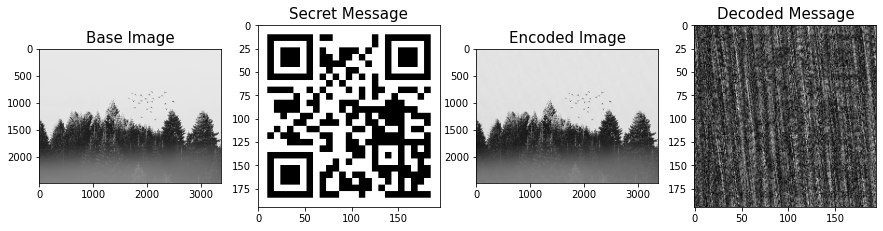

In [77]:
fig, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].set_title('Base Image', fontsize = 15)
ax[0].imshow(imgBaseV, cmap='gray')

ax[1].set_title('Secret Message', fontsize = 15)
ax[1].imshow(imgSecretV, cmap='gray')

encodedImageV = encode(imgBaseV, imgSecretV)
encodedImage = imgBaseHSV
encodedImage[:,:,2] = encodedImageV*255

noise = decode(encode(imgBaseV, np.zeros(imgSecretV.shape)+1), imgSecretV)

finalImage = np.copy(imgBase)
finalImage[:,:,:3] = convertRGB(encodedImage)
matplotlib.image.imsave('./images/encoded.png', finalImage.real)
ax[2].set_title('Encoded Image', fontsize = 15)
ax[2].imshow(np.clip(encodedImageV.real, 0, 255), cmap='gray')

#encodedImage = convertHSV(finalImage)
#encodedImageV = normalizedV(encodedImage)
secret = decode(encodedImageV,imgSecretV)
matplotlib.image.imsave('./images/decoded.png', secret.real)
ax[3].set_title('Decoded Message', fontsize = 15)
ax[3].imshow(np.clip(abs(secret), 0, 255), cmap='gray')

In [18]:
print(np.clip(secret.real, 0, 255))

[[1.40031636 0.59292167 1.02538829 ... 0.14425805 1.2132296  1.69183487]
 [0.         0.92814395 0.60563829 ... 0.43461018 2.20618345 1.29602896]
 [0.         1.33357834 0.         ... 0.54738727 1.6723875  1.33351251]
 ...
 [0.68614347 0.4993886  0.36244909 ... 0.72168916 1.56645526 1.65376073]
 [0.62594541 1.02593475 0.33263175 ... 0.0956498  1.24487498 1.22392734]
 [0.73000751 1.12286946 0.87184298 ... 0.38163336 1.39470248 1.87697306]]


[[223. 226. 230. ... 228. 229. 228.]
 [229. 228. 229. ... 229. 229. 228.]
 [234. 231. 230. ... 230. 231. 229.]
 ...
 [129. 128. 129. ... 105. 104. 103.]
 [128. 127. 128. ... 105. 105. 105.]
 [127. 127. 128. ... 105. 105. 105.]]


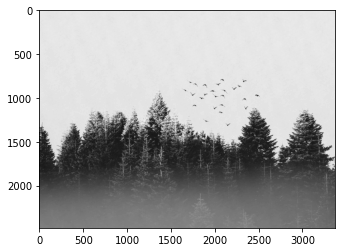

In [19]:
print(encodedImage[:,:,2])
plt.imshow(encodedImage[:,:,2], cmap='gray')

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


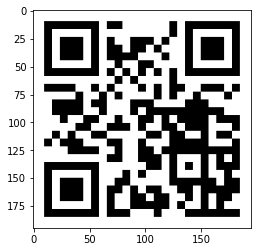

In [20]:
print(imgSecretV)
plt.imshow(imgSecretV, cmap='gray')

[[0.87916666 0.89166665 0.90416664 ... 0.9        0.90416664 0.90416664]
 [0.9        0.9        0.9        ... 0.9        0.9        0.9       ]
 [0.9166667  0.90833336 0.9        ... 0.9        0.9        0.9       ]
 ...
 [0.50416666 0.50416666 0.5083333  ... 0.41666666 0.4125     0.4125    ]
 [0.5        0.5        0.5        ... 0.42083332 0.41666666 0.41666666]
 [0.5        0.5        0.5        ... 0.42083332 0.41666666 0.41666666]]


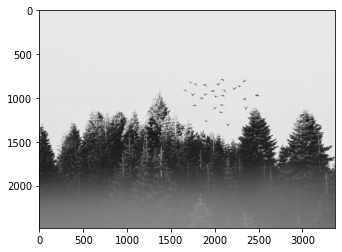

In [21]:
print(imgBaseV)
plt.imshow(imgBaseV, cmap='gray')

[[1.33500397 0.58671628 1.06075432 ... 0.65181551 1.28845549 1.69445001]
 [1.1779556  0.96711869 0.91039692 ... 0.54657852 2.25046813 1.28193906]
 [0.42373655 1.33650383 0.52640595 ... 0.70503022 2.15519972 1.34771194]
 ...
 [0.79888545 0.57206515 0.36332003 ... 1.38049322 1.68762869 1.84851879]
 [0.71583789 1.10956409 0.32720301 ... 0.99278969 1.37900886 1.30450161]
 [0.84030597 1.15552005 0.86841814 ... 0.74986134 1.4021425  1.91681986]]


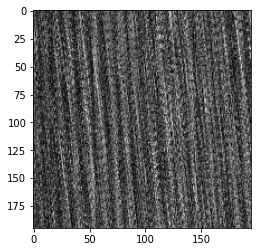

In [51]:
print(abs(noise))
plt.imshow(abs(noise), cmap='gray')

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


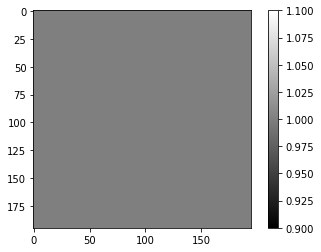

In [23]:
test = np.zeros(imgSecretV.shape)+1
print(test)
plt.imshow(test, cmap='gray')
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


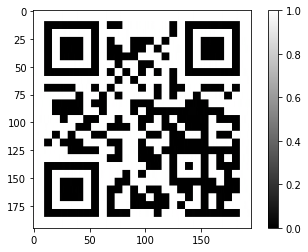

In [24]:
testing = np.zeros(imgSecretV.shape)+1
#test = np.fft.ifft2(np.fft.fft2(testing))
test = applyIFFT(applyFFT(imgSecret))
print(test)
plt.imshow(test.real, cmap='gray')
plt.colorbar()

[[ 5.37550013e+06+1.15074686e-11j  3.73592454e+04+7.21843477e+04j
   6.71612916e+04-5.19566431e+04j ...  9.51291675e+03+2.61134515e+03j
   6.71612916e+04+5.19566431e+04j  3.73592454e+04-7.21843477e+04j]
 [ 4.57739008e+04-1.51731948e+06j -9.29014260e+04-5.08553211e+04j
  -6.59713547e+04+8.89947220e+04j ... -1.65587121e+04+1.46238320e+04j
  -6.29894278e+04-3.51609808e+04j -3.05728820e+04+7.66623660e+04j]
 [ 3.25634707e+05+6.88640713e+04j  5.27397306e+04-1.89024264e+04j
   1.69712178e+04-1.22732420e+05j ...  6.84526095e+03-2.65853360e+04j
   6.56589855e+04+2.56358770e+04j -3.59223819e+04-7.26468419e+04j]
 ...
 [-1.54931131e+05+2.04614094e+05j  4.97715976e+04-2.49480987e+04j
  -6.09185732e+04-3.89108238e+03j ...  3.51361210e+04+1.63818073e+04j
   2.75508146e+04-8.24391924e+04j -1.07657081e+04+1.27376967e+04j]
 [ 3.25634707e+05-6.88640713e+04j -3.59223819e+04+7.26468419e+04j
   6.56589855e+04-2.56358770e+04j ... -3.13906155e+04+1.31607609e+04j
   1.69712178e+04+1.22732420e+05j  5.27397306e+

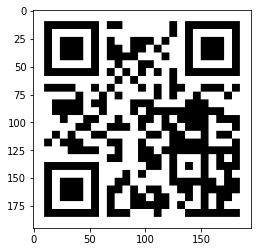

In [78]:
def encode(img1, img2):
    imgBase = applyFFT(img1)
    height, width = imgBase.shape
    
    imgSecret = applyFFT(img2)
    imgSecretFlat = imgSecret.flatten()
    ind = 0
    
    if((height*width)/sector_size**2 < len(imgSecretFlat)):
        print('Encoding not possible')
    
    for x in range (0, height-idx, sector_size):
        for y in range (0, width-idx, sector_size):
            if ind < len(imgSecretFlat):
                imgBase[x+idx, y+idx] = imgSecretFlat[ind]
                #print(ind,x+idx,y+idx)
                ind += 1
            else:
                break
    return imgBase
    #return applyIFFT(imgBase)

def decode(img1,img2):
    # imgBase = applyFFT(img1)
    imgBase = img1
    height, width = imgBase.shape
    
    secret_h, secret_w = img2.shape
    print(secret_h, secret_w)
    secret = np.zeros((secret_h*secret_w), dtype=np.complex128)
    ind = 0
    for x in range (0, height-idx, sector_size):
        for y in range (0, width-idx, sector_size):
            if ind < len(secret):
                secret[ind] = imgBase[x+idx, y+idx]
                #print(ind,x+idx,y+idx)
                ind += 1
            else:
                break
    secret = secret.reshape((secret_h,secret_w))
    return applyIFFT(secret)

testenc = encode(imgBaseV, imgSecretV)
print(abs(testenc))
print(abs(applyFFT(abs(applyIFFT(testenc)))))
testdec = decode(testenc, imgSecretV)
plt.imshow(testdec, cmap='gray')
# print(testdec)

# test = applyIFFT(applyFFT(imgSecretV))
# plt.imshow(abs(test), cmap='gray')
# print(abs(test))